In [1]:
import pickle
import random

In [2]:
with open('naver_news_summary.pkl', 'rb') as file:
    data = pickle.load(file)

In [3]:
from sentence_transformers import SentenceTransformer, util

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-09-19 17:12:38.233594: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-19 17:12:38.259296: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 17:12:38.736436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning

In [4]:
model = SentenceTransformer('snunlp/KR-SBERT-Medium-extended-klueNLItriplet_PARpair_QApair-klueSTS')

model = model.to('cuda')

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

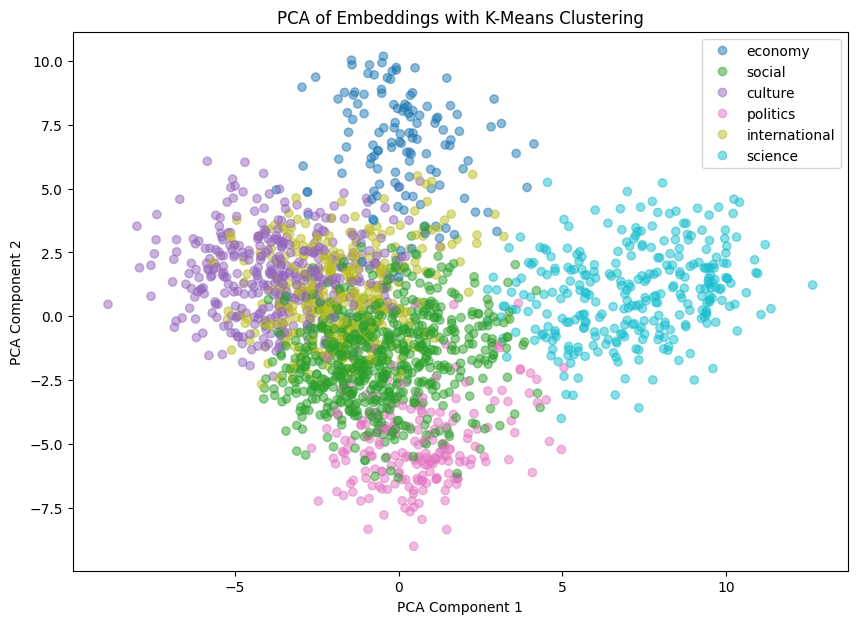

In [14]:
embeddings_dict = {}

# Generating embeddings for each key in the data
for key, sentences in data.items():
    embeddings = model.encode(sentences, convert_to_tensor=True).to('cuda')
    embeddings_dict[key] = embeddings

# Collecting all embeddings into a single array
all_embeddings = []
keys = []

for key, embeddings in embeddings_dict.items():
    all_embeddings.append(embeddings.cpu().numpy())
    keys.extend([key] * embeddings.shape[0])

all_embeddings = np.vstack(all_embeddings)

# Recomputing KMeans clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(all_embeddings)

# Applying PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Creating a scatter plot of the PCA-reduced embeddings with the actual key labels for clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='tab10', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Embeddings with K-Means Clustering')

# Adding legend with key values
unique_keys = list(set(keys))
handles, _ = scatter.legend_elements(num=n_clusters)
legend_labels = [unique_keys[i] for i in range(n_clusters)]
plt.legend(handles, legend_labels, loc='upper right')

plt.show()

In [7]:
from sklearn.metrics import silhouette_score
# Calculating the silhouette score
silhouette_avg = silhouette_score(all_embeddings, labels)

silhouette_avg

0.03452965

In [8]:
wcss = kmeans.inertia_
wcss

544082.25